# Telecom Churn Case Study

## <font color="blue">Problem Statement
> In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecom industries experiences an average of 15% to 25% annual churn rate. Given the fact it costs  5-10 times more to acquire a new customer than to retain a existing customer. So customer retention become more important than customer acquisition.
    
## <font color="blue">Business Objectives
>- For many operators, retaining high profitable customers is the number one business goal.To reduce customer churn, the operators need to predict which customers are high risk of churn.
>- The goal is to build a machine learning model that can able to predict the churning customers using the given dataset.
    

## <font color="blue">Data Understanding and Cleaning

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import xgboost as xgb

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Changing settings to view all columns
pd.set_option("display.max_columns",None)

In [3]:
# Reading the data
telecom = pd.read_csv("train.csv", index_col=0)

# Reading the final test data
final_test = pd.read_csv("test.csv", index_col=0)

telecom.head(3)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.0,0.0,0.0,0.0,0.0,0.0,2.23,0.00,0.28,5.29,16.04,2.33,0.0,0.0,0.0,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.0,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.4,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.

In [4]:
# Checking the dimensions of the dataset
telecom.shape

(69999, 171)

In [5]:
# Checking the informations of the dataset
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    circle_id                 int64  
 1    loc_og_t2o_mou            float64
 2    std_og_t2o_mou            float64
 3    loc_ic_t2o_mou            float64
 4    last_date_of_month_6      object 
 5    last_date_of_month_7      object 
 6    last_date_of_month_8      object 
 7    arpu_6                    float64
 8    arpu_7                    float64
 9    arpu_8                    float64
 10   onnet_mou_6               float64
 11   onnet_mou_7               float64
 12   onnet_mou_8               float64
 13   offnet_mou_6              float64
 14   offnet_mou_7              float64
 15   offnet_mou_8              float64
 16   roam_ic_mou_6             float64
 17   roam_ic_mou_7             float64
 18   roam_ic_mou_8             float64
 19   roam_og_mou_6             float64
 20   roam

In [6]:
# Checking the value counts
for index,cols in enumerate(telecom.columns):
    print("\033[1m",str(index+1)+")",cols,"\033[0m")
    print(telecom[cols].value_counts())
    print("\n")

 1) circle_id 
109    69999
Name: circle_id, dtype: int64


 2) loc_og_t2o_mou 
0.0    69297
Name: loc_og_t2o_mou, dtype: int64


 3) std_og_t2o_mou 
0.0    69297
Name: std_og_t2o_mou, dtype: int64


 4) loc_ic_t2o_mou 
0.0    69297
Name: loc_ic_t2o_mou, dtype: int64


 5) last_date_of_month_6 
6/30/2014    69999
Name: last_date_of_month_6, dtype: int64


 6) last_date_of_month_7 
7/31/2014    69600
Name: last_date_of_month_7, dtype: int64


 7) last_date_of_month_8 
8/31/2014    69266
Name: last_date_of_month_8, dtype: int64


 8) arpu_6 
 0.000      2603
 20.000       72
-5.000        72
 1.000        49
 1.500        38
            ... 
 302.334       1
 203.494       1
 45.941        1
 3.420         1
 420.059       1
Name: arpu_6, Length: 61615, dtype: int64


 9) arpu_7 
 0.000      2666
-5.000       107
 20.000       49
 1.000        38
 1.500        37
            ... 
 253.392       1
 266.712       1
 166.851       1
 394.185       1
 139.941       1
Name: arpu_7, Length: 61

 45) std_og_t2f_mou_7 
0.00      59759
0.83         42
0.28         41
0.21         40
0.43         38
          ...  
15.39         1
13.00         1
465.79        1
12.00         1
83.09         1
Name: std_og_t2f_mou_7, Length: 1991, dtype: int64


 46) std_og_t2f_mou_8 
0.00     58777
0.41        46
0.35        44
0.25        44
0.56        41
         ...  
28.79        1
64.08        1
26.44        1
13.91        1
62.28        1
Name: std_og_t2f_mou_8, Length: 1945, dtype: int64


 47) std_og_t2c_mou_6 
0.0    67231
Name: std_og_t2c_mou_6, dtype: int64


 48) std_og_t2c_mou_7 
0.0    67312
Name: std_og_t2c_mou_7, dtype: int64


 49) std_og_t2c_mou_8 
0.0    66296
Name: std_og_t2c_mou_8, dtype: int64


 50) std_og_mou_6 
0.00      20627
0.58         68
0.48         66
0.35         65
0.53         65
          ...  
131.56        1
992.56        1
945.21        1
710.54        1
677.66        1
Name: std_og_mou_6, Length: 21837, dtype: int64


 51) std_og_mou_7 
0.00       21390
0

Name: spl_ic_mou_6, Length: 78, dtype: int64


 96) spl_ic_mou_7 
0.00    59864
0.20      892
0.18      536
0.06      353
0.05      321
        ...  
2.96        1
2.00        1
1.28        1
7.00        1
2.91        1
Name: spl_ic_mou_7, Length: 103, dtype: int64


 97) spl_ic_mou_8 
0.00     58037
0.25      1053
0.50       578
0.21       520
0.06       305
         ...  
16.86        1
1.23         1
1.11         1
0.99         1
1.71         1
Name: spl_ic_mou_8, Length: 95, dtype: int64


 98) isd_ic_mou_6 
0.00       56351
0.01         251
0.03         170
0.05         125
0.46          66
           ...  
6789.41        1
78.11          1
40.86          1
99.01          1
99.46          1
Name: isd_ic_mou_6, Length: 4421, dtype: int64


 99) isd_ic_mou_7 
0.00      55971
0.01        111
0.46         71
0.05         69
0.03         66
          ...  
167.88        1
49.28         1
47.99         1
55.04         1
64.34         1
Name: isd_ic_mou_7, Length: 4640, dtype: int64


 1

Name: night_pck_user_7, dtype: int64


 151) night_pck_user_8 
0.0    18030
1.0      387
Name: night_pck_user_8, dtype: int64


 152) monthly_2g_6 
0    64896
1     4688
2      389
3       20
4        6
Name: monthly_2g_6, dtype: int64


 153) monthly_2g_7 
0    64695
1     4806
2      467
3       27
4        3
5        1
Name: monthly_2g_7, dtype: int64


 154) monthly_2g_8 
0    64817
1     4738
2      413
3       24
4        6
5        1
Name: monthly_2g_8, dtype: int64


 155) sachet_2g_6 
0     60982
1      3898
2      1744
3       936
4       647
5       414
6       326
7       236
8       212
9       152
10      132
11       91
12       80
13       37
14       33
15       20
16       14
17       11
19        8
18        5
22        5
21        4
20        3
25        3
24        1
28        1
30        1
32        1
34        1
42        1
Name: sachet_2g_6, dtype: int64


 156) sachet_2g_7 
0     60677
1      3652
2      1713
3       957
4       767
5       560
6       425
7   

### Handling Missing values

In [7]:
# Checking for missing values
missing = round((telecom.isnull().sum() / telecom.shape[0])*100,2).sort_values(ascending=False)
print("Total columns that has missing values are",len(missing))
missing[missing !=0]

Total columns that has missing values are 171


count_rech_2g_6             74.90
arpu_2g_6                   74.90
night_pck_user_6            74.90
date_of_last_rech_data_6    74.90
total_rech_data_6           74.90
                            ...  
last_date_of_month_8         1.05
loc_og_t2o_mou               1.00
std_og_t2o_mou               1.00
loc_ic_t2o_mou               1.00
last_date_of_month_7         0.57
Length: 125, dtype: float64

#### <font color="blue">Cleaning date columns

In [8]:
# Extracting the date columns
date_cols = [x for x in telecom.columns if "date" in x]

In [9]:
# Checking the date columns
print(round(telecom[date_cols].isnull().sum() / telecom.shape[0] *100,2))

last_date_of_month_6         0.00
last_date_of_month_7         0.57
last_date_of_month_8         1.05
date_of_last_rech_6          1.57
date_of_last_rech_7          1.76
date_of_last_rech_8          3.52
date_of_last_rech_data_6    74.90
date_of_last_rech_data_7    74.48
date_of_last_rech_data_8    73.69
dtype: float64


In [10]:
# Creating a function to fill mode values
def fill_mode_cols(df, col_list):
    for cols in col_list:
        mode = df[cols].mode()[0]
        df[cols].fillna(value=mode, inplace=True)

# Filling mode values for the last dates and last rech columns
fill_mode_cols(telecom, date_cols[:6])
fill_mode_cols(final_test, date_cols[:6])

In [11]:
# Converting date series columns into useful information
total_dataset = [telecom, final_test]
for df in total_dataset:
    # Converting date columns into date time format
    df[date_cols] = df[date_cols].apply(pd.to_datetime)

    # Creating recency recharge column
    df["recent_rech_6"] = df["last_date_of_month_6"] - df["date_of_last_rech_6"]
    df["recent_rech_7"] = df["last_date_of_month_7"] - df["date_of_last_rech_7"]
    df["recent_rech_8"] = df["last_date_of_month_8"] - df["date_of_last_rech_8"]

    # Creating recency recharge for data column
    df["recent_rech_data_6"] = df["last_date_of_month_6"] - df["date_of_last_rech_data_6"]
    df["recent_rech_data_7"] = df["last_date_of_month_7"] - df["date_of_last_rech_data_7"]
    df["recent_rech_data_8"] = df["last_date_of_month_8"] - df["date_of_last_rech_data_8"]

In [12]:
# Creating a list of recency columns in the dataset
recency_cols = [x for x in telecom.columns if "recent" in x]

# Extracting the dates from the columns
for df in total_dataset:
    for cols in recency_cols:
        df[cols] = df[cols].astype(str)
        df[cols] = df[cols].str.split(" ",expand=True)[0]
    
# Imputing the missing values in the recency cols with zero
for df in total_dataset:
    for cols in recency_cols:
        df.loc[(df[cols]=="NaT"), cols] = 0
    
# Dropping the dates columns which is reduntant columns
for df in total_dataset:
    df.drop(date_cols, axis=1, inplace=True)

# Converting the recency_cols into integer type
for df in total_dataset:
    df[recency_cols] = df[recency_cols].astype("int")

#### <font color="blue">Cleaning categorical columns

In [13]:
# Extracting the categorical columns
cat_cols = ["churn_probability","fb_user_8","fb_user_7","fb_user_6","night_pck_user_8",
            "night_pck_user_7","night_pck_user_6"]

# Imputing the null values of categorical columns with other new category(-1)
for cols in cat_cols:
    telecom[cols].fillna(value=-1, inplace=True)
for cols in cat_cols[1:]:
    final_test[cols].fillna(value=-1, inplace=True)

#### <font color="blue">Cleaning numeric columns

In [14]:
# Extracting the numeric columns from the dataset
num_cols = telecom.columns.difference(cat_cols + recency_cols)

# Lets extract the recharge, arpu, other columns from the num_cols
mou_cols = [x for x in num_cols if "mou" in x]
rec_cols = [x for x in num_cols if "rec" in x]
arpu_cols = [x for x in num_cols if "arpu" in x]
other_cols = [x for x in num_cols if "other" in x]

# Imputing ARPU and recharge columns with zero
def zero_imputation(list_col):
    for df in total_dataset:
        for cols in list_col:
            df[cols].fillna(value=0, inplace=True)
        
# Imputing zero for all the remaining columns
zero_imputation(mou_cols)
zero_imputation(rec_cols)
zero_imputation(arpu_cols)
zero_imputation(other_cols)

# Checking the missing values after imputation
print("The total missing values in the telecom train dataset after cleaning is",telecom.isnull().sum().sum())
print("The total missing values in the final test after cleaning is",final_test.isnull().sum().sum())

The total missing values in the telecom train dataset after cleaning is 0
The total missing values in the final test after cleaning is 0


In customer churn we assume there are three phases of customer lifecycle:
- Good_phase(month 6 and 7)
- Action_phase(month 8)
- Churn_phase(the next month), and in a separate column, we have the information whether the particular customer has churned or not in the next month.

#### <font color="blue">Deriving New Columns

In [15]:
for df in total_dataset:
    df['total_rech_amt_data_6'] = df["av_rech_amt_data_6"] * df["total_rech_data_6"]
    df['total_rech_amt_data_7'] = df["av_rech_amt_data_7"] * df["total_rech_data_7"]
    df['total_rech_amt_data_8'] = df["av_rech_amt_data_8"] * df["total_rech_data_8"]
    df["total_rech_data_amt_good_phase"] = df['total_rech_amt_data_6'] + df['total_rech_amt_data_7']
    df["total_rech_amt_good_phase"] = df["total_rech_amt_6"] + df["total_rech_amt_7"]
    df["total_amt_good_phase"] = df["total_rech_data_amt_good_phase"] + df["total_rech_amt_good_phase"]
    df["total_amt_action_phase"] =df['total_rech_amt_data_8'] + df["total_rech_amt_8"]
    df["amt_drop"] = (df["total_amt_good_phase"] - df["total_amt_action_phase"]).astype(int)
    df["increased_purchase"] = (df["total_rech_num_8"]-(df["total_rech_num_6"] + df["total_rech_num_7"])/2)
    df["decreased_purchase"] = ((df["total_rech_num_6"] + df["total_rech_num_7"])/2 - df["total_rech_num_8"])
    df["query_raised"] = ((df["loc_og_t2c_mou_6"] + df["loc_og_t2c_mou_7"] + df["loc_og_t2c_mou_8"])>0).astype(int)
    df["avg_query_mou"] = ((df["loc_og_t2c_mou_6"] + df["loc_og_t2c_mou_7"] + df["loc_og_t2c_mou_8"])/3)
    df["avg_mou_good_phase"] = ((df["total_og_mou_6"] + df["total_og_mou_7"]) / 2)
    df["increased_mou"] = (df["total_og_mou_8"] - df["avg_mou_good_phase"])
    df["decrease_mou"] = (df["avg_mou_good_phase"] - df["total_og_mou_8"])
    df["avg_arpu_good_phase"] = ((df["arpu_6"] + df["arpu_7"])/2)
    df["arpu_increase_action_phase"] = (df["arpu_8"] - df["avg_arpu_good_phase"]).astype(int)
    df["total_service_packs_6"] = (df["night_pck_user_6"] + df["monthly_2g_6"] + df["sachet_2g_6"]
                                   + df["monthly_3g_6"] + df["sachet_3g_6"])
    df["total_service_packs_7"] = (df["night_pck_user_7"] + df["monthly_2g_7"] + df["sachet_2g_7"]
                                   + df["monthly_3g_7"] + df["sachet_3g_7"])
    df["total_service_packs_8"] = (df["night_pck_user_8"] + df["monthly_2g_8"] + df["sachet_2g_8"]
                                   + df["monthly_3g_8"] + df["sachet_3g_8"])
    df["avg_service_packs_good_phase"] = (df["total_service_packs_6"] + df["total_service_packs_7"])/2
    df["diff_increase_service_packs_purchase"] = df["total_service_packs_8"] - df["avg_service_packs_good_phase"]
    df['diff_total_service_packs_good_active_phase']=(df['total_service_packs_6']+df['total_service_packs_7']-
                                                      df['total_service_packs_8'])
    df['diff_ic_og_6'] = df['total_ic_mou_6']-df['total_og_mou_6']
    df['diff_ic_og_7'] = df['total_ic_mou_7']-df['total_og_mou_7']
    df['diff_ic_og_8'] = df['total_ic_mou_8']-df['total_og_mou_8']
    df["avg_diff_ic_og_good_phase"] = (df["diff_ic_og_6"] + df["diff_ic_og_7"])/2
    df["increase_diff_ic_og"] = df["diff_ic_og_8"] - df["avg_diff_ic_og_good_phase"]
    df['diff_vol_3g_2g_6'] = df['vol_3g_mb_6']-df['vol_2g_mb_6']
    df['diff_vol_3g_2g_7'] = df['vol_3g_mb_7']-df['vol_2g_mb_7']
    df['diff_vol_3g_2g_8'] = df['vol_3g_mb_8']-df['vol_2g_mb_8']
    df["avg_diff_vol_3g_2g_good_phase"] = (df["diff_vol_3g_2g_6"] + df["diff_vol_3g_2g_7"])/2
    df["increase_diff_ic_og"] = df["diff_vol_3g_2g_8"] - df["avg_diff_vol_3g_2g_good_phase"]
    df['diff_ic_good_active_phase']=df['total_ic_mou_6']+df['total_ic_mou_7']-df['total_ic_mou_8']
    df['diff_og_good_active_phase']=df['total_og_mou_6']+df['total_og_mou_7']-df['total_og_mou_8']
    df['diff_2g_good_active_phase']=df['vol_2g_mb_6']+df['vol_2g_mb_7']-df['vol_2g_mb_8']
    df['diff_3g_good_active_phase']=df['vol_3g_mb_6']+df['vol_3g_mb_7']-df['vol_3g_mb_8']
    df['diff_total_rech_amt_good_active']= df['total_rech_amt_6']+df['total_rech_amt_7']-df['total_rech_amt_8']

#### Derived Columns:
1. total_amt_good_phase - Total amount spend by the customers in the good phase.
2. total_rech_amt_data - Total recharge done by the customers monthly
3. amt_drop - Amount spend by the customer decreased in action phase
3. increased_purchase - Customer's purchase increases steadily.
4. decreased_purchase -  Customer's purchase decreases steadily.
5. query_raised - whether a cutomer contacted call center for query
6. avg_query_mou - Increase in minutes of usage in consecutive month
7. avg_mou_good_phase - Decrease in minutes of usage in consecutive month
8. avg_arpu_good_phase - Average arpu in good phase
9. arpu_increase_action_phase - Increase in arpu in action phase
10. avg_service_packs_good_phase - Average service packs in good phase
11. avg_diff_ic_og_good_phase - Average difference in incoming and outgoing in good phase
12. avg_diff_vol_3g_2g_good_phase - Average difference in volume of 3g and 2g in good phase
13. diff_total_rech_amt_good_active - Difference in total recharge amount in active phase

#### <font color="blue">Dropping reduntant column:

In [16]:
# Checking for columns having same values throughout the column
nunique = telecom.nunique()
Need_to_drop = nunique[nunique == 1].index
Need_to_drop

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [17]:
# Dropping columns having same values
for df in total_dataset:
    df.drop(nunique[nunique==1].index, axis=1, inplace=True)

In [18]:
# Checking the shape of the dataset
print("The shape of the telecom dataset is",telecom.shape)
print("The shape of the final test dataset is",final_test.shape)

The shape of the telecom dataset is (69999, 195)
The shape of the final test dataset is (30000, 194)


### Handling Outliers

In [19]:
# Checking for outliers using statistical summary
num_cols = num_cols.difference(Need_to_drop)
telecom[num_cols].describe(percentiles=[.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,aon,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_6,arpu_7,arpu_8,aug_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,ic_others_6,ic_others_7,ic_others_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,1220.6397

In [20]:
# As we can see some features has outliers
# Creating a function for outliers
def remove_outliers(df, col_list):
    for cols in col_list:
        Q1 = df[cols].quantile(0.001)
        Q3 = df[cols].quantile(0.999)
        IQR = Q3 - Q1
        df = df[(df[cols] >= Q1-2.5*IQR) & (df[cols] <= Q3+2.5*IQR)]
        
# Removing outliers from numeric columns
remove_outliers(telecom, num_cols)

## <font color="blue">Exploratory Data Analysis

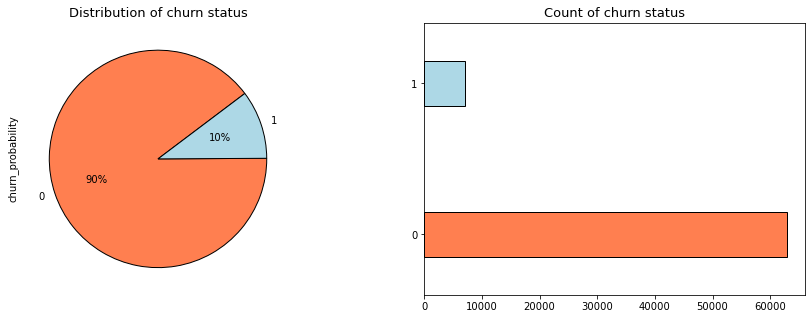

In [21]:
# Checking the churn rate
plt.figure(figsize=[15,5])

# Plotting a pie chart for churn probablity column
plt.subplot(1,2,1)
telecom["churn_probability"].value_counts().plot.pie(autopct="%1.0f%%",startangle=37, colors=["coral","lightblue"],
                                                    wedgeprops={"linewidth":1,"edgecolor":"k"})
plt.title("Distribution of churn status",fontsize=13)

# Plotting a horizontal bar chart for churn rate
plt.subplot(1,2,2)
telecom["churn_probability"].value_counts().plot.barh(width=0.3,color=["coral","lightblue"],linewidth=1, edgecolor="k")
plt.title("Count of churn status", fontsize=13)
plt.show()

#### <font color="blue">Inference from the plot:
> - The dataset is highly imbalanced.
> - We need to balance the data using some class imbalance technique

# Plotting pairplot of difference columns
plt.figure(figsize=[20,20])
sns.pairplot(telecom[[x for x in telecom.columns if 'diff' in x]])
plt.show()

In [22]:
# creating a function for box plot
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = telecom
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn_probability",hue="churn_probability",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn_probability",hue="churn_probability",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn_probability",hue="churn_probability",
                showfliers=False,palette=("plasma"))
    plt.legend(loc='upper left')
    plt.show()

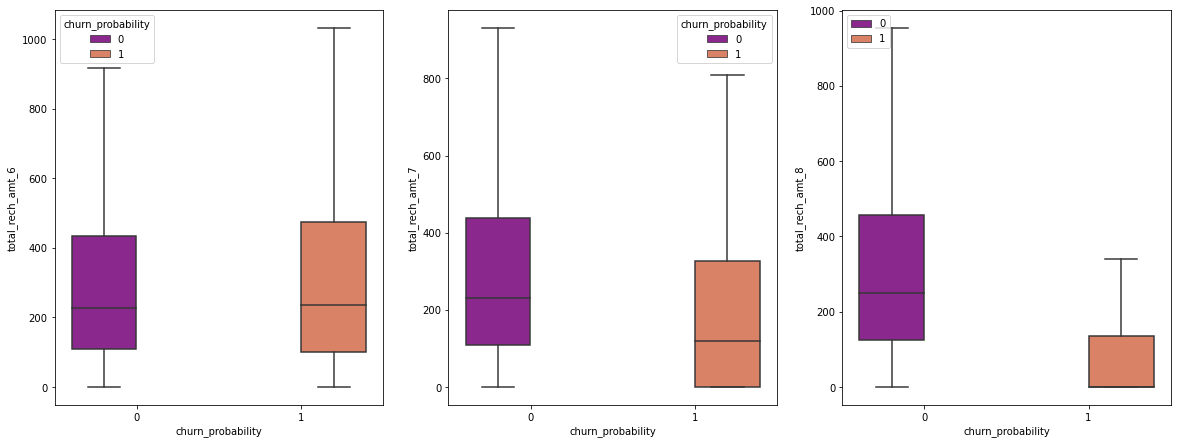

In [23]:
# Plotting boxplot for total_rech_amt
plot_box_chart("total_rech_amt")

#### <font color="blue">Inference from the plot:
> - For non churn cases the total recharge amount is increasing in consecutive month
> - For churn cases the total recharge amount is decreasing in consecutive month

In [24]:
# Deriving a new column
for df in total_dataset:
    df["steady_dec_total_rech"] =  ((df["total_rech_amt_6"] > df["total_rech_amt_7"]) & 
                                    (df["total_rech_amt_7"] > df["total_rech_amt_8"])).astype(int)

#### Derived Columns:
1. steady_dec_total_rech - Mapped 1 if steady decrease of total rech in consecutive months and else zero

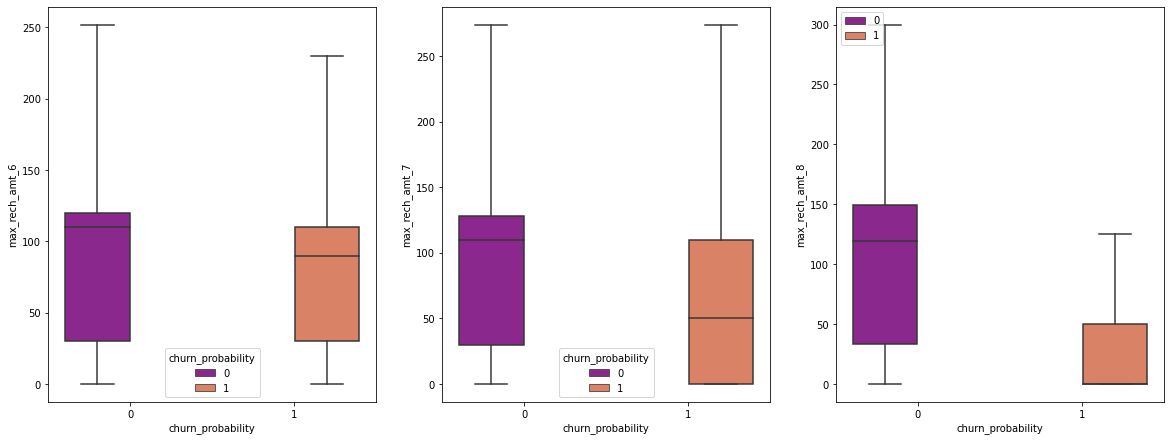

In [25]:
# Plotting box plot for max_rech_amt
plot_box_chart('max_rech_amt')

#### <font color="blue">Inference from the plot:
> - For non churn cases the maximum recharge amount is almost same in consecutive month
> - For churn cases the maximum recharge amount is decreasing in consecutive month

In [26]:
# Deriving a new column
for df in total_dataset:
    df["steady_dec_max_rech"] =  ((df["max_rech_amt_6"] > df["max_rech_amt_7"]) & 
                                    (df["max_rech_amt_7"] > df["max_rech_amt_8"])).astype(int)

#### Derived Columns:
1. steady_dec_max_rech - Mapped 1 if steady decrease of maximum rech in consecutive months and else zero

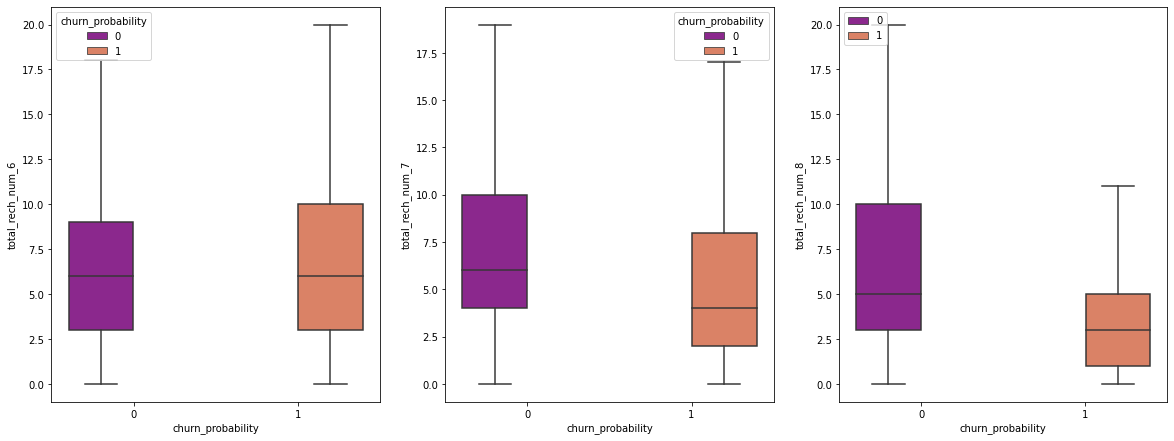

In [27]:
# Plotting boxplot for total_rech_num columns
plot_box_chart('total_rech_num')

#### <font color="blue">Inference from the plot:
> - For non churn cases the total recharge number is almost same in consecutive month
> - For churn cases the total recharge number is decreasing in consecutive month

In [28]:
# Deriving a new column
for df in total_dataset:
    df["steady_dec_total_rech_num"] =  ((df["total_rech_num_6"] > df["total_rech_num_7"]) & 
                                    (df["total_rech_num_7"] > df["total_rech_num_8"])).astype(int)

#### Derived Columns:
1. steady_dec_total_rech_num - Mapped 1 if steady decrease of total recharge number in consecutive months and else zero

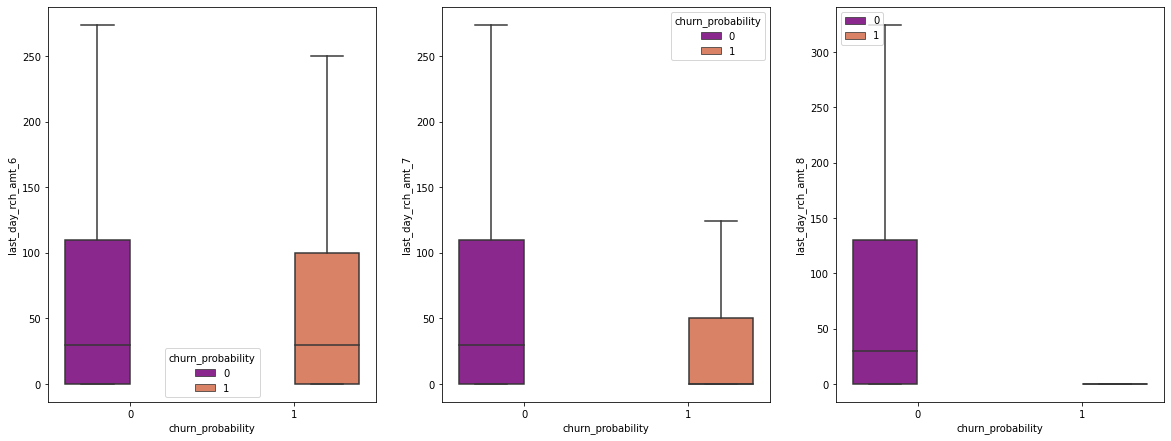

In [29]:
plot_box_chart('last_day_rch_amt')

#### <font color="blue">Inference from the plot:
> - For non churn cases the last day recharge amount is almost same in consecutive month.
> - For churn cases the total recharge amount is decreasing in consecutive month.

In [30]:
# Deriving a new column
for df in total_dataset:
    df["steady_dec_last_day_rec_amt"] =  ((df["last_day_rch_amt_6"] > df["last_day_rch_amt_7"]) & 
                                    (df["last_day_rch_amt_7"] > df["last_day_rch_amt_8"])).astype(int)

#### Derived Columns:
1. steady_dec_last_day_rec_amt - Mapped 1 if steady decrease in last day recharge amount in consecutive months and else zero.

In [31]:
# Creating a function for plotting bar chart
def plot_mean_bar_chart(df,columns_list):
    non_churn = df[df.churn_probability==0].filter(columns_list)
    churn = df[df.churn_probability==1].filter(columns_list)

    non_churn_df = pd.DataFrame([non_churn.mean()],index={'Non Churn'})
    churn_df = pd.DataFrame([churn.mean()],index={'Churn'})
    mean_bar = pd.concat([non_churn_df, churn_df])
    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

In [32]:
# Creating a list of monthly subscription
monthly_subcription_2g_3g = telecom.columns[telecom.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

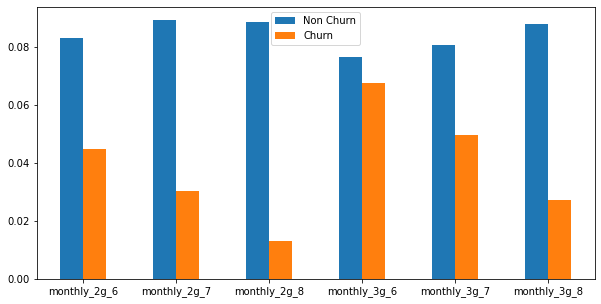

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.083207,0.089411,0.088616,0.076749,0.080917,0.088170
Churn,0.044728,0.030426,0.013180,0.067583,0.049635,0.027201


In [33]:
# Plotting bar plot for monthly subsription
plot_mean_bar_chart(telecom, monthly_subcription_2g_3g)

#### <font color="blue">Inference from the plot:
> - For non churn cases the monthly subscription is almost same in consecutive month.
> - For churn cases the monthly subscription is decreasing in consecutive month.

In [34]:
# Deriving new columns
for df in total_dataset:
    df["steady_dec_monthly_subs_2g"] =  ((df["monthly_2g_6"] > df["monthly_2g_7"]) & 
                                    (df["monthly_2g_7"] > df["monthly_2g_8"])).astype(int)
    df["steady_dec_monthly_subs_3g"] =  ((df["monthly_3g_6"] > df["monthly_3g_7"]) & 
                                    (df["monthly_3g_7"] > df["monthly_3g_8"])).astype(int)    

#### Derived Columns:
1. steady_dec_monthly_subs( 2g and 3g) - Mapped 1 if steady decrease in monthly subscription in consecutive months and else zero.

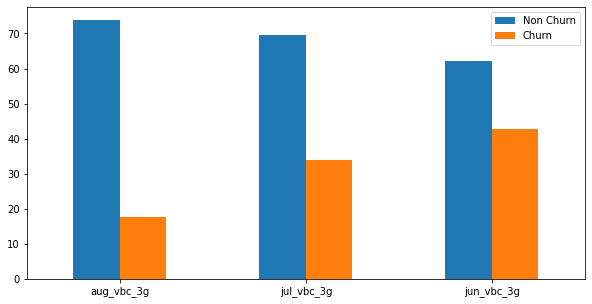

,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
Non Churn,73.827215,69.554308,62.032521
Churn,17.700251,34.039739,42.836966


In [35]:
# Creating a new list containing the volumn based columns names
vbc_column = telecom.columns[telecom.columns.str.contains('vbc_3g',regex=True)]
vbc_column.T.tolist()

# Plotting bar plot on vbc_columns
plot_mean_bar_chart(telecom, vbc_column)

#### <font color="blue">Inference from the plot:
> - For non churn cases the volume based cost is increasing in consecutive month from june to august and maximum in august.
> - For churn cases the volume based cost is decreasing in consecutive month from june to august and minimum in august.

In [36]:
# Deriving new columns
for df in total_dataset:
    df["steady_dec_vbc"] =  ((df["jun_vbc_3g"] > df["jul_vbc_3g"]) & 
                                    (df["jul_vbc_3g"] > df["aug_vbc_3g"])).astype(int)
    df["steady_inc_vbc"] =  ((df["jun_vbc_3g"] < df["jul_vbc_3g"]) & 
                                    (df["jul_vbc_3g"] < df["aug_vbc_3g"])).astype(int)

#### Derived Columns:
1. steady_dec_vbc - Mapped 1 if steady decrease in volume based cost in consecutive months and else zero.
2. steady_inc_vbc - Mapped 1 if steady increase in volume based cost in consecutive months and else zero.

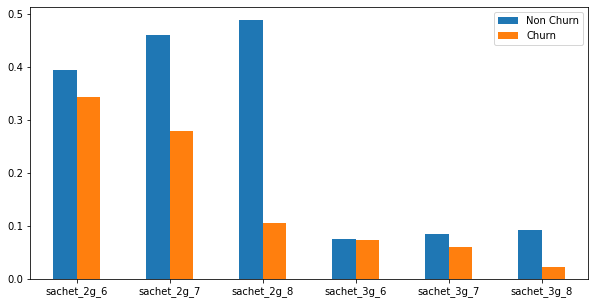

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,0.394070,0.459907,0.488587,0.075525,0.083828,0.092672
Churn,0.342961,0.278323,0.104879,0.073752,0.060432,0.022154


In [37]:
# Checking Service schemes with validity smaller than a month for 2G/3G
SC_2g_3g_col = telecom.columns[telecom.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

# Plotting bar plot
plot_mean_bar_chart(telecom, SC_2g_3g_col)

#### <font color="blue">Inference from the plot:
> - For non churn cases the purchase of smaller service schemes is increasing in consecutive month from june to august and maximum in august.
> - For churn cases the smaller service schemes is decreasing in consecutive month from june to august and minimum in august.

In [38]:
# Deriving new columns
for df in total_dataset:
    df["steady_dec_sachet"] =  ((df["sachet_2g_6"] > df["sachet_2g_7"]) & 
                                    (df["sachet_2g_7"] > df["sachet_2g_8"])).astype(int)
    df["steady_inc_sachet"] =  ((df["sachet_2g_6"] < df["sachet_2g_7"]) & 
                                    (df["sachet_2g_7"] < df["sachet_2g_8"])).astype(int)

#### Derived Columns:
1. steady_dec_sachet - Mapped 1 if steady decrease in  purchase of smaller service schemes in consecutive months and else zero.
2. steady_inc_sachet - Mapped 1 if steady increase in purchase of smaller service schemes in consecutive months and else zero.

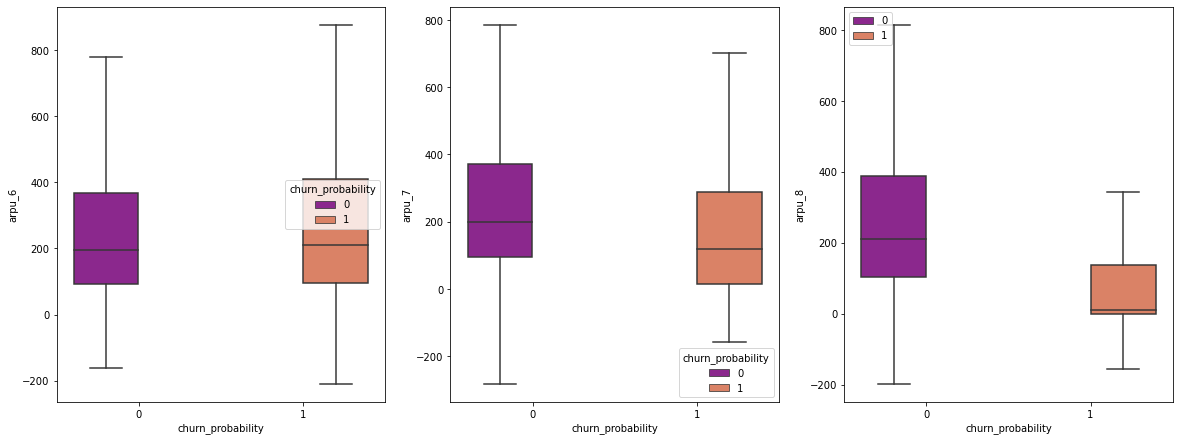

In [39]:
# Plotting boxplot for arpu columns
plot_box_chart('arpu')

#### <font color="blue">Inference from the plot:
> - For churn cases the arpu is decreasing in consecutive month from june to august and minimum in august.

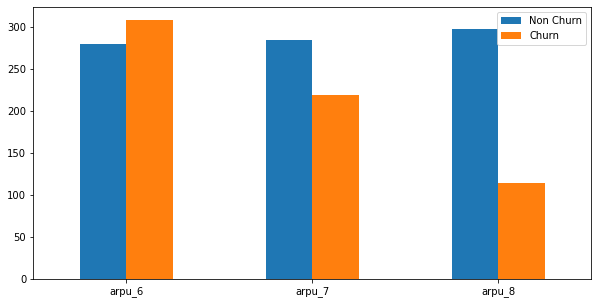

,arpu_6,arpu_7,arpu_8
Non Churn,280.280668,284.891073,297.535694
Churn,308.289067,219.081400,114.226380


In [40]:
# Plotting bar plot for arpu features
plot_mean_bar_chart(telecom, arpu_cols[-3:])

In [41]:
# Deriving new columns
for df in total_dataset:
    df["steady_dec_arpu"] =  ((df["arpu_6"] > df["arpu_7"]) & 
                                    (df["arpu_7"] > df["arpu_8"])).astype(int)

#### Derived Columns:
1. steady_dec_arpu - Mapped 1 if steady decrease in  arpu in consecutive months and else zero.

In [42]:
# Defining a function to create heatmap
def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="Greens",annot=True)
    plt.show()

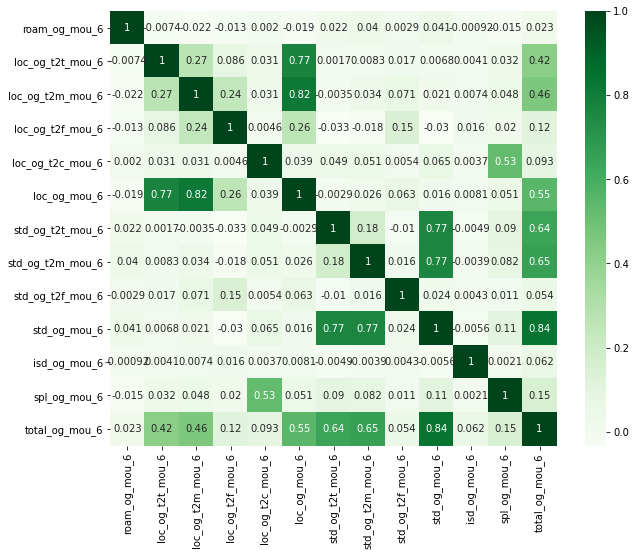

In [43]:
# Extracting mou og cols 
mou_og_cols6 = telecom.columns[telecom.columns.str.contains('.*_og_.*mou_6',regex=True)]

# Plotting heat map
heatmap(10,8,telecom.filter(mou_og_cols6))

#### <font color="blue">Inference from the plot:
> - local ougoing t2c is highly correlated with special outgoing minute of usage.

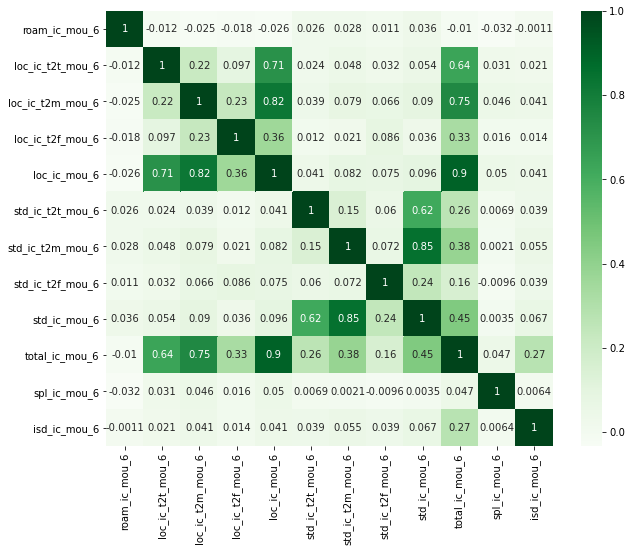

In [44]:
# Extracting mou in cols 
mou_ic_cols6 = telecom.columns[telecom.columns.str.contains('.*_ic_.*mou_6',regex=True)]

# Plotting heat map
heatmap(10,8,telecom.filter(mou_ic_cols6))

#### <font color="blue">Inference from the plot:
> - As we can see that the features loc_in_mou, total_in_mou, and std_in_mou are highly correlated with other features. and we can drop it using pca.

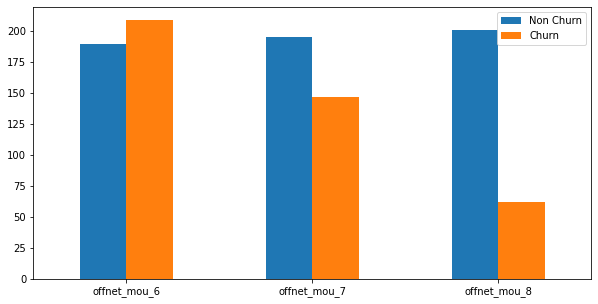

,offnet_mou_6,offnet_mou_7,offnet_mou_8
Non Churn,189.023578,194.502932,200.198654
Churn,208.525578,146.238458,62.277647


In [45]:
# Extracting offnet features
offnet_usage_service_col = telecom.columns[telecom.columns.str.contains('offnet.*mou',regex=True)]

# Plotting bar plot
plot_mean_bar_chart(telecom, offnet_usage_service_col)

#### <font color="blue">Inference from the plot:
> - In the case of churn customers, the offnet usage is dropping in the consecutive months.

In [46]:
# Deriving new columns
for df in total_dataset:
    df["steady_dec_offnet"] =  ((df["offnet_mou_6"] > df["offnet_mou_7"]) & 
                                    (df["offnet_mou_7"] > df["offnet_mou_8"])).astype(int)

#### Derived Columns:
1. steady_dec_offnet - Mapped 1 if steady decrease in offnet usage in consecutive months and else zero.

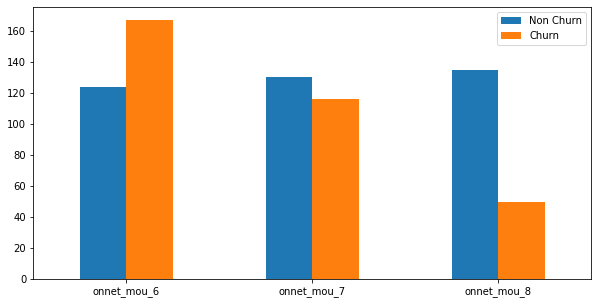

,onnet_mou_6,onnet_mou_7,onnet_mou_8
Non Churn,123.475244,130.208978,134.589595
Churn,166.784865,115.935868,49.731139


In [47]:
# Extracting onnet features
onnet_usage_service_col = telecom.columns[telecom.columns.str.contains('onnet.*mou',regex=True)]

# Plotting bar plot
plot_mean_bar_chart(telecom, onnet_usage_service_col)

#### <font color="blue">Inference from the plot:
> - In the case of churn customers, the onnet usage is dropping in the consecutive months.

In [48]:
# Deriving new columns
for df in total_dataset:
    df["steady_dec_onnet"] =  ((df["onnet_mou_6"] > df["onnet_mou_7"]) & 
                                    (df["onnet_mou_7"] > df["onnet_mou_8"])).astype(int)

#### Derived Columns:
1. steady_dec_onnet - Mapped 1 if steady decrease in onnet usage in consecutive months and else zero.

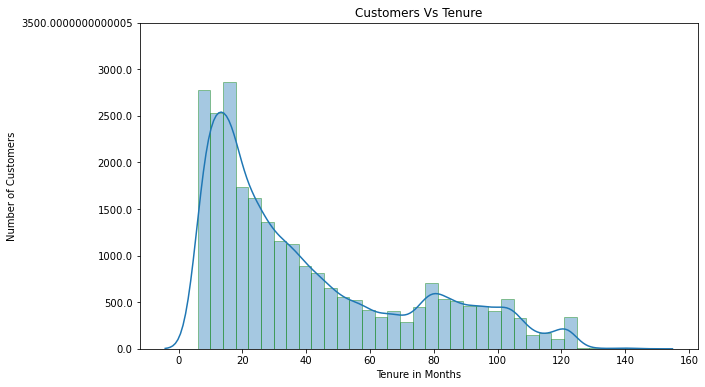

In [49]:
# Plotting boxplot for age on network
plt.figure(figsize=[10,6])

# Plotting a distribution plot of age on network
ax = sns.distplot(telecom["aon"]/30, hist=True, bins=35, hist_kws={'edgecolor':'green'})
plt.yticks(ax.get_yticks(), ax.get_yticks() * 100000)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers Vs Tenure')
plt.show()

#### <font color="blue">Inference from the plot:
> - Most of the customers belongs to less than 20 months tenure.

In [74]:
# Lets create a bin of tenure feature
bins = [0,6,12,24,48,60,72]
labels = ["less than 6 Months", "6-12 Months","1-2 Years","2-4 Years","4-5 Years", "Above 5 Years"]
for df in total_dataset:
    df["tenure_range"] = pd.cut(df["aon"]/30, bins=bins,labels=labels) 

In [75]:
telecom["tenure_range"].value_counts()

KeyError: 'tenure_range'

In [72]:
plt.figure(figsize=(6,4))
sns.countplot(x ='tenure_range', hue = 'churn_probability',data = telecom,palette=("plasma"))
plt.title("Tenure range of customers")
plt.show()

ValueError: Could not interpret input 'tenure_range'

<Figure size 432x288 with 0 Axes>

## <font color="blue"> Data Preparation

### Creating dummies 

In [52]:
# Creating dummies for categorical features in telecom dataset
dum = pd.get_dummies(telecom["tenure_range"], drop_first=True)
telecom = pd.concat([telecom, dum], axis=1)
telecom.drop("tenure_range", axis=1, inplace=True)

# Creating dummies for categorical features in final test dataset
dum = pd.get_dummies(final_test["tenure_range"], drop_first=True)
final_test = pd.concat([final_test, dum], axis=1)
final_test.drop("tenure_range", axis=1, inplace=True)

In [53]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Columns: 213 entries, arpu_6 to Above 5 Years
dtypes: float64(158), int32(22), int64(28), uint8(5)
memory usage: 108.1 MB


In [54]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 69999 to 99998
Columns: 212 entries, arpu_6 to Above 5 Years
dtypes: float64(158), int32(22), int64(27), uint8(5)
memory usage: 45.2 MB


### Splitting into train and test set

In [55]:
# Splitting the dataset into dependent and independent variables
y = telecom["churn_probability"]
X = telecom.drop("churn_probability", axis=1)

In [56]:
# Splitting into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48999, 212)
(21000, 212)
(48999,)
(21000,)


### Handling Class Imbalance

In [57]:
# Handling imbalance in the data
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)

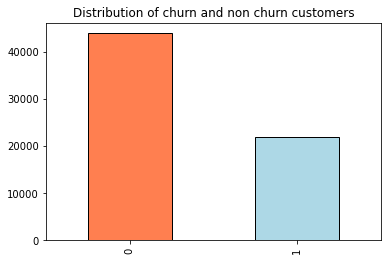

In [58]:
# Checking the distribution of the resampled training set
y_train.value_counts().plot.bar(color=["coral","lightblue"],linewidth=1, edgecolor="k")
plt.title("Distribution of churn and non churn customers")
plt.show()

In [59]:
print("The shape of the train after resampling is", X_train.shape)
y_train.value_counts()

The shape of the train after resampling is (65949, 212)


0    43966
1    21983
Name: churn_probability, dtype: int64

### Scaling the Features

In [60]:
X_train.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,recent_rech_6,recent_rech_7,recent_rech_8,recent_rech_data_6,recent_rech_data_7,recent_rech_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_data_amt_good_phase,total_rech_amt_good_phase,total_amt_good_phase,total_amt_action_phase,amt_drop,increased_purchase,decreased_purchase,query_raised,avg_query_mou,avg_mou_good_phase,increased_mou,decrease_mou,avg_arpu_good_phase,arpu_increase_action_phase,total_service_packs_6,total_service_packs_7,total_service_packs_8,avg_service_packs_good_phase,diff_increase_service_packs_purchase,diff_total_service_packs_good_active_phase,diff_ic_og_6,diff_ic_og_7,diff_ic_og_8,avg_diff_ic_og_good_phase,increase_diff_ic_og,diff_vol_3g_2g_6,diff_vol_3g_2g_7,diff_vol_3g_2g_8,avg_diff_vol_3g_2g_good_phase,diff_ic_good_active_phase,diff_og_good_active_phase,diff_2g_good_active_phase,diff_3g_good_active_phase,diff_total_rech_amt_good_active,steady_dec_total_rech,steady_dec_max_rech,steady_dec_total_rech_num,steady_dec_last_day_rec_amt,steady_dec_monthly_subs_2g,steady_dec_monthly_subs_3g,steady_dec_vbc,steady_inc_vbc,steady_dec_sachet,steady_inc_sachet,steady_dec_arpu,steady_dec_offnet,steady_dec_onnet,6-12 Months,1-2 Years,2-4 Years,4-5 Years,Above 5 Years
count,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000,65949.000000

In [61]:
# Extracting all the categorical columns
steady_cols = [x for x in telecom.columns if "steady" in x]
time_cols = telecom.iloc[:,-5:]
cat_cols.extend(steady_cols)
cat_cols.extend(time_cols)

In [62]:
# Instantiating the scaler function
scaler = StandardScaler()

# Creating dataframes
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns) 

# Fitting the numerical columns of the training set and transforming it
all_num_cols = list(telecom.columns.difference(cat_cols).values)
X_train_df[all_num_cols] = scaler.fit_transform(X_train_df[all_num_cols])
X_test_df[all_num_cols] = scaler.transform(X_test_df[all_num_cols])
final_test[all_num_cols] = scaler.transform(final_test[all_num_cols])

In [63]:
X_train_df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,recent_rech_6,recent_rech_7,recent_rech_8,recent_rech_data_6,recent_rech_data_7,recent_rech_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_data_amt_good_phase,total_rech_amt_good_phase,total_amt_good_phase,total_amt_action_phase,amt_drop,increased_purchase,decreased_purchase,query_raised,avg_query_mou,avg_mou_good_phase,increased_mou,decrease_mou,avg_arpu_good_phase,arpu_increase_action_phase,total_service_packs_6,total_service_packs_7,total_service_packs_8,avg_service_packs_good_phase,diff_increase_service_packs_purchase,diff_total_service_packs_good_active_phase,diff_ic_og_6,diff_ic_og_7,diff_ic_og_8,avg_diff_ic_og_good_phase,increase_diff_ic_og,diff_vol_3g_2g_6,diff_vol_3g_2g_7,diff_vol_3g_2g_8,avg_diff_vol_3g_2g_good_phase,diff_ic_good_active_phase,diff_og_good_active_phase,diff_2g_good_active_phase,diff_3g_good_active_phase,diff_total_rech_amt_good_active,steady_dec_total_rech,steady_dec_max_rech,steady_dec_total_rech_num,steady_dec_last_day_rec_amt,steady_dec_monthly_subs_2g,steady_dec_monthly_subs_3g,steady_dec_vbc,steady_inc_vbc,steady_dec_sachet,steady_inc_sachet,steady_dec_arpu,steady_dec_offnet,steady_dec_onnet,6-12 Months,1-2 Years,2-4 Years,4-5 Years,Above 5 Years
count,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04,6.594900e+04

### Applying PCA to reduce dimensionality

In [64]:
# Instantiating PCA
pca = PCA(random_state=100)

# Fitting X_train data
pca.fit(X_train_df)

PCA(random_state=100)

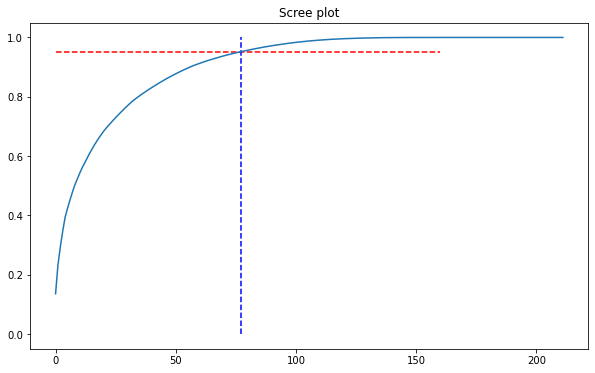

In [65]:
# Checking the cumulative variance
var_cum = np.cumsum(pca.explained_variance_ratio_)

# Plotting the var_cum to select the number of features
plt.figure(figsize=[10,6])
plt.plot(var_cum)
plt.hlines(y=0.95, xmin=0, xmax=160, colors="r", linestyle="--")
plt.vlines(x=77, ymin=0, ymax=1, colors="b", linestyles="--")
plt.title("Scree plot")
plt.show()

#### <font color="blue">Inference from the plot:
> - Around 77 principal components can able to explain 95% variance.

In [66]:
# Reducing the dimensions so that it can explain 90% of variance
pca2 = PCA(0.95, random_state=100)

# Transforming the X_train into principal components
X_train_pca = pca2.fit_transform(X_train_df)
X_test_pca = pca2.transform(X_test_df)
final_test_pca = pca2.transform(final_test)

# Tranforming into dataframes
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)
final_test_pca = pd.DataFrame(final_test_pca)

In [67]:
# Checking the shape of the dataframe
print("The shape of the training dataset is",X_train_pca.shape)
print("The shape of the test dataset is",X_test_pca.shape)

The shape of the training dataset is (65949, 77)
The shape of the test dataset is (21000, 77)


## <font color="blue">Modelling

In [68]:
def performance(model, y_pred):
    print("The accuracy score is", accuracy_score(y_test, y_pred))
    print("The precision score is",precision_score(y_test, y_pred))
    print("The recall score is",recall_score(y_test, y_pred))
    print("The F1 score is", f1_score(y_test, y_pred))
    
    # Plotting roc curve
    y_pred_proba =model.predict_proba(X_test_pca)
    fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:,1])
    roc_auc = auc(fpr, tpr)
    print("Auc score is", roc_auc)
    plt.plot(fpr, tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC')

### Naive Bayes

In [80]:
# Building naive bayes classifier

# Instantiating and fitting the model
bnb = BernoulliNB()

# Tuning the hyperparameters
params_NB = {"alpha":[0,1,2,3,4,5,6]}
nb = GridSearchCV(estimator=bnb, param_grid=params_NB, cv=5,verbose=1,scoring='accuracy')

# Fitting the data
nb.fit(X_train_pca, y_train)
nb.best_params_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


{'alpha': 0}

The accuracy score is 0.8307142857142857
The precision score is 0.31237113402061856
The recall score is 0.5774178180085755
The F1 score is 0.40541896638233815
Auc score is 0.8055402842609188


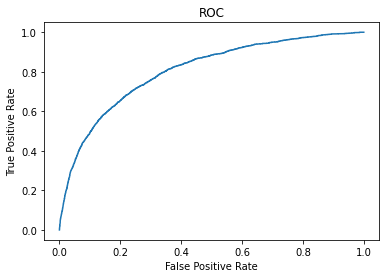

In [81]:
# Building the model using tuned hyperparameters
bnb_tuned = BernoulliNB(alpha=0)
bnb_tuned.fit(X_train_pca, y_train)
y_pred = bnb_tuned.predict(X_test_pca)
performance(bnb_tuned,y_pred)

### Logistic Regression with PCA

In [78]:
# Instantiating the logistic regression function
model = LogisticRegression(random_state=100)

# Tuning the hyperparameter
params_lr = {"solver":['newton-cg', 'lbfgs', 'liblinear'],
              "penalty":['l2',"l1"],
              "C":[10, 1.0, 0.1]}
lr = GridSearchCV(estimator=model, param_grid=params_lr, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)

# Fitting the data
lr = lr.fit(X_train_pca, y_train)
lr.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

The best hyperparameters are:
- 'C'= 10
- 'penalty'= 'l2'
- 'solver'= 'liblinear'

In [79]:
# Fitting the dataset to the tuned model
lr_tuned = LogisticRegression(random_state=100, C=10, penalty="l2", solver="liblinear")
lr_tuned.fit(X_train_pca, y_train)

# Making the prediction
y_pred_proba = lr_tuned.predict_proba(X_test_pca)

# maping probability more than 0.5 as 1 and remaining zero
lr_df = pd.DataFrame(y_pred_proba[:,1], columns=["Churn_prob"])
lr_df["Churn"] = y_test.values
lr_df["Prediction"] = lr_df["Churn_prob"].apply(lambda x:1 if x>0.5 else 0)

The accuracy score is 0.8797619047619047
The precision score is 0.4380093131548312
The recall score is 0.717008099094807
The F1 score is 0.5438121047877146
Auc score is 0.8855148030790257


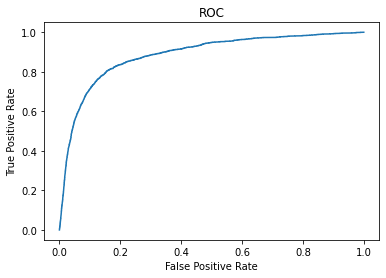

In [80]:
# Checking the performance
performance(lr_tuned, lr_df["Prediction"])

### Logistic Regression with PCA

In [ ]:
# Instantiating the model
lr_no_pca = sm.GLM(y_train,(sm.add_constant(X_train_df)), family=sm.families.Binomial())

### Random Forest

In [69]:
# Finding the best hyperparameters using cross validation

# Instantiating the random forest classifier
rf = RandomForestClassifier()

# Creating the params
params = {'bootstrap': [True, False],
         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Fitting and checking the best params

# grid_search.fit(X_train_pca, y_train)                           
# grid_search.best_params_

The best hyperparameters are:
- n_estimatores=500
- boostrap=True
- max_depth=None
- max_features="auto"
- min_samples_leaf=1
- min_samples_split=5

The accuracy score is 0.9154285714285715
The precision score is 0.580629056415377
The recall score is 0.554073368270605
The F1 score is 0.5670404680643589
Auc score is 0.9064668316764676


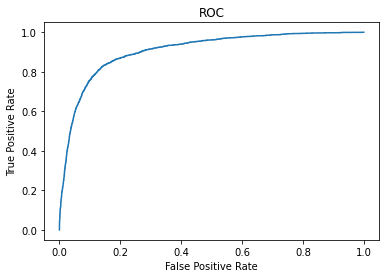

In [70]:
# Modeling with the tuned hyperparameters
rf_tuned = RandomForestClassifier(random_state=100, n_estimators=500, bootstrap=True, max_depth=None, max_features="auto",
                                 min_samples_leaf=1, min_samples_split=5)
rf_tuned.fit(X_train_pca, y_train)

# Predicting for test dataset
y_pred = rf_tuned.predict(X_test_pca)

# Checking the performance
performance(rf_tuned, y_pred)

### Ada Boost

In [109]:
# Instantiating adaptive boosting model
ada = AdaBoostClassifier(random_state=100)

# Tuning the hyperparameter
params = {"n_estimators":[50,100,150,200,300],
         "learning_rate":[0.01,0.1,1.0]}
grid_search = GridSearchCV(estimator=ada,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="accuracy")
# Fitting the model
#grid_search.fit(X_train_pca, y_train)
#grid_search.best_params_

The best hyperparameters are:
- n_estimatores=100
- learning_rate=0.1

The accuracy score is 0.8842857142857142
The precision score is 0.44387928111224145
The recall score is 0.6236303001429252
The F1 score is 0.518621236133122
Auc score is 0.8687749757714269


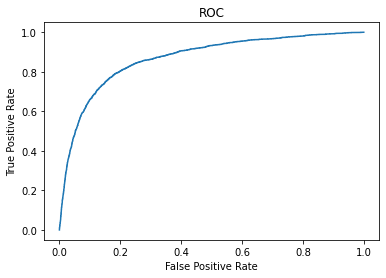

In [111]:
# Instantiating the model with tuned parameters
ada_tuned = AdaBoostClassifier(random_state=100, n_estimators=100, learning_rate=0.1)
ada_tuned.fit(X_train_pca, y_train)

# Predicting for the test data
y_pred = ada_tuned.predict(X_test_pca)

# Checking the performance
performance(ada_tuned, y_pred)

### XG Boost

In [113]:
# Instantiating Extreme gradient boosting method
xg = xgb.XGBClassifier()

# Tuning the hyperparameters
params = {'n_estimators' : [100, 200, 500, 750],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]}
grid_search = GridSearchCV(estimator=xg,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Fitting the model
#grid_search.fit(X_train_pca, y_train)
#grid_search.best_params_

The best hyperparameters are:
- n_estimatores= 200
- learning_rate= 0.01
- min_child_weight= 5
- gamma= 1
- subsample= 0.8
- colsample_bytree= 1
- max_depth = 10

[11:24:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy score is 0.9034761904761904
The precision score is 0.5129776496034607
The recall score is 0.6779418770843259
The F1 score is 0.5840344756823312
Auc score is 0.9083347299520768


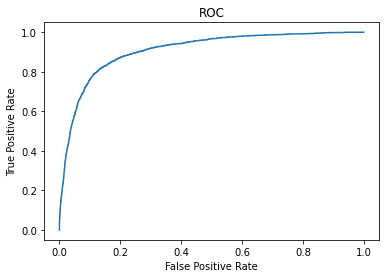

In [118]:
# Instantiating model with tuned hyperparameters
xg_tuned = xgb.XGBClassifier(n_estimators=200, learning_rate=0.01, min_child_weight = 5,
                           gamma=1, subsample=0.8,colsample_bytree=1, max_depth=10 )
xg_tuned.fit(X_train_pca, y_train)

# Predicting the y value
y_pred = xg_tuned.predict(X_test_pca)

# Checking the performance
performance(xg_tuned, y_pred)

### KNN

In [119]:
# Instantiating the model
knn = KNeighborsClassifier()

# Tuning the hyperparameters
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
params = {"leaf_size":[20,30,40],
         "n_neighbors":[5,10,20],
         "p":[1,2]}
grid_search = GridSearchCV(estimator=knn,
                           param_grid=params,
                           cv = cv,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Fitting the model
# grid_search.fit(X_train_pca, y_train)
# grid_search.best_params_

The best hyperparameters are:
- leaf_size= 20
- n_neighbors= 5
- p = 1

In [ ]:
# Instantiating the model with tuned hyperparamters
knn_tuned = KNeighborsClassifier(leaf_size=20, n_neighbors=5, p=1)
knn_tuned.fit(X_train_pca, y_train)

# Predicting the y values
y_pred = knn_tuned.predict(X_test_pca)

# Checking the performance
performance(knn_tuned, y_pred)

## <font color="blue">Final Model
Among all the models the random forest classifier model is performing good.
> - The accuracy score is 0.915
> - The precision score is 0.579
> - The recall score is 0.559
> - The F1 score is 0.569
> - Auc score is 0.907

## <font color="blue">Feature Importance

In [98]:
col = list(X_train.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.113009,0.122366,-0.016867,arpu_6
1,0.124160,0.123251,0.002053,arpu_7
2,0.110324,0.093202,0.050900,arpu_8
3,0.043272,0.131327,-0.066313,onnet_mou_6
4,0.049950,0.137683,-0.055845,onnet_mou_7
5,0.046425,0.111671,-0.019601,onnet_mou_8
6,0.060569,0.145232,-0.029582,offnet_mou_6
7,0.067745,0.150624,-0.015637,offnet_mou_7
8,0.062515,0.117960,0.029335,offnet_mou_8
9,0.009610,0.011985,0.003725,roam_ic_mou_6


The row in the dataframe represents the importance of the features, and the Top 05 important features are :
- Average revenue per user for a month.
- onnet minutes of usage of the customers for a month.
- offnet minutes of usage of the customers for a month.
- Roaming incoming minutes of usage.
- Roaming outgoing minutes of usage.

## <font color="blue">Recommendation:
- If minutes of usage decreases steadily in the consecutive months, then the customer has high risk of churn
- Average revenue per user seems to be most important feature in determining churn prediction.
- Less number of **high value customer** are churing but for last **6 month** no new high valued cusotmer is onboarded which is concerning and company should concentrate on that aspect.
- Customers with less than 4 years of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group.
- Incoming and Outgoing Calls on romaing are strong indicators of churn behaviour

In [92]:
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except ( ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp